In [1]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.stats import linregress
import pickle
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from sklearn.utils import resample

In [ ]:
# Root directory: change to where data downloaded to
root_dir = '/data2/jbaldwin/WCAS2023'

# Read in and format the household survey data

In [4]:
data = pd.read_csv(root_dir+"/VULNERABILITY/regional_inventories.csv") 

walls = np.unique(data.walls)

roofs = np.unique(data.roof)

regions = np.unique(data.region)


# Calculate total population in each region
pop_total = {}
for region in regions:
    pop_total[region] = np.sum(data.loc[(data['region'] == region)].population)
    

# Create grid of populations in different types of buildings
pop_per_type = {}
for region in regions:
    pop_per_type[region] = np.zeros([7,7])
    for i in range(len(roofs)):
        roof = roofs[i]
        for j in range(len(walls)):
            wall = walls[j]
            try:
                pop_per_type[region][i,j] = float(data.loc[(data['region'] == region) & (data['walls'] == wall) & (data['roof'] == roof)].population)
            except:
                pass

In [5]:
roofs

array(['Light material (cogon,nipa,anahaw)',
       'Mixed but predominantly light materials',
       'Mixed but predominantly salvaged materials',
       'Mixed but predominantly strong materials', 'Not Applicable',
       'Salvaged/makeshift materials',
       'Strong material(galvanized,iron,al,tile,concrete,brick,stone,asbestos)'],
      dtype=object)

# Exploratory plots to visualize distribution of housing types

[]

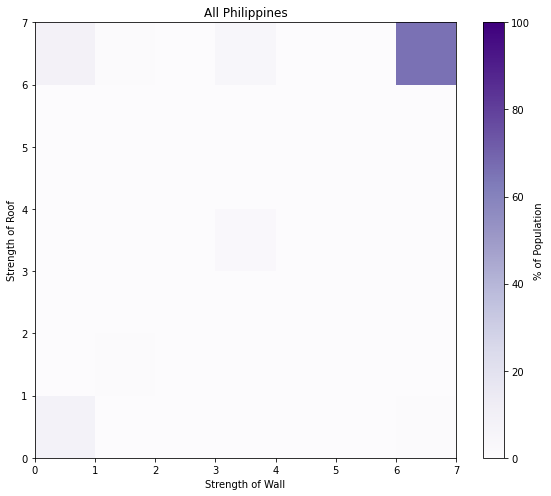

In [6]:
# All Philippines % of Population in Different Type Structures
plt.figure(figsize=(8,7))

allphi_pop_per_type = np.zeros([7,7])
allphi_pop_total = 0
for region in regions:
    allphi_pop_total += pop_total[region]
    allphi_pop_per_type += pop_per_type[region]
plt.pcolormesh(allphi_pop_per_type/allphi_pop_total*100,cmap=plt.cm.Purples)
cbar = plt.colorbar()
plt.clim(0,100)
plt.title('All Philippines')
plt.xlabel('Strength of Wall')
plt.ylabel('Strength of Roof')
cbar.set_label('% of Population')

plt.tight_layout()
plt.plot()

[]

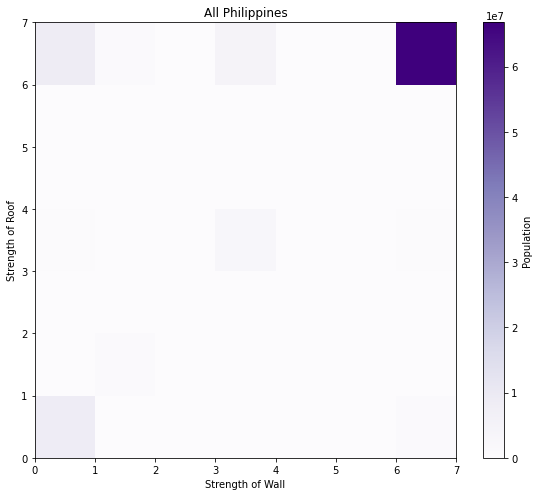

In [7]:
# All Philippines Population in Different Type Structures
plt.figure(figsize=(8,7))

total_pop_per_type = np.zeros([7,7])
for region in regions:
    total_pop_per_type = total_pop_per_type + pop_per_type[region]
plt.pcolormesh(total_pop_per_type,cmap=plt.cm.Purples)
cbar = plt.colorbar()
plt.title('All Philippines')
plt.xlabel('Strength of Wall')
plt.ylabel('Strength of Roof')
cbar.set_label('Population')

plt.tight_layout()
plt.plot()

[]

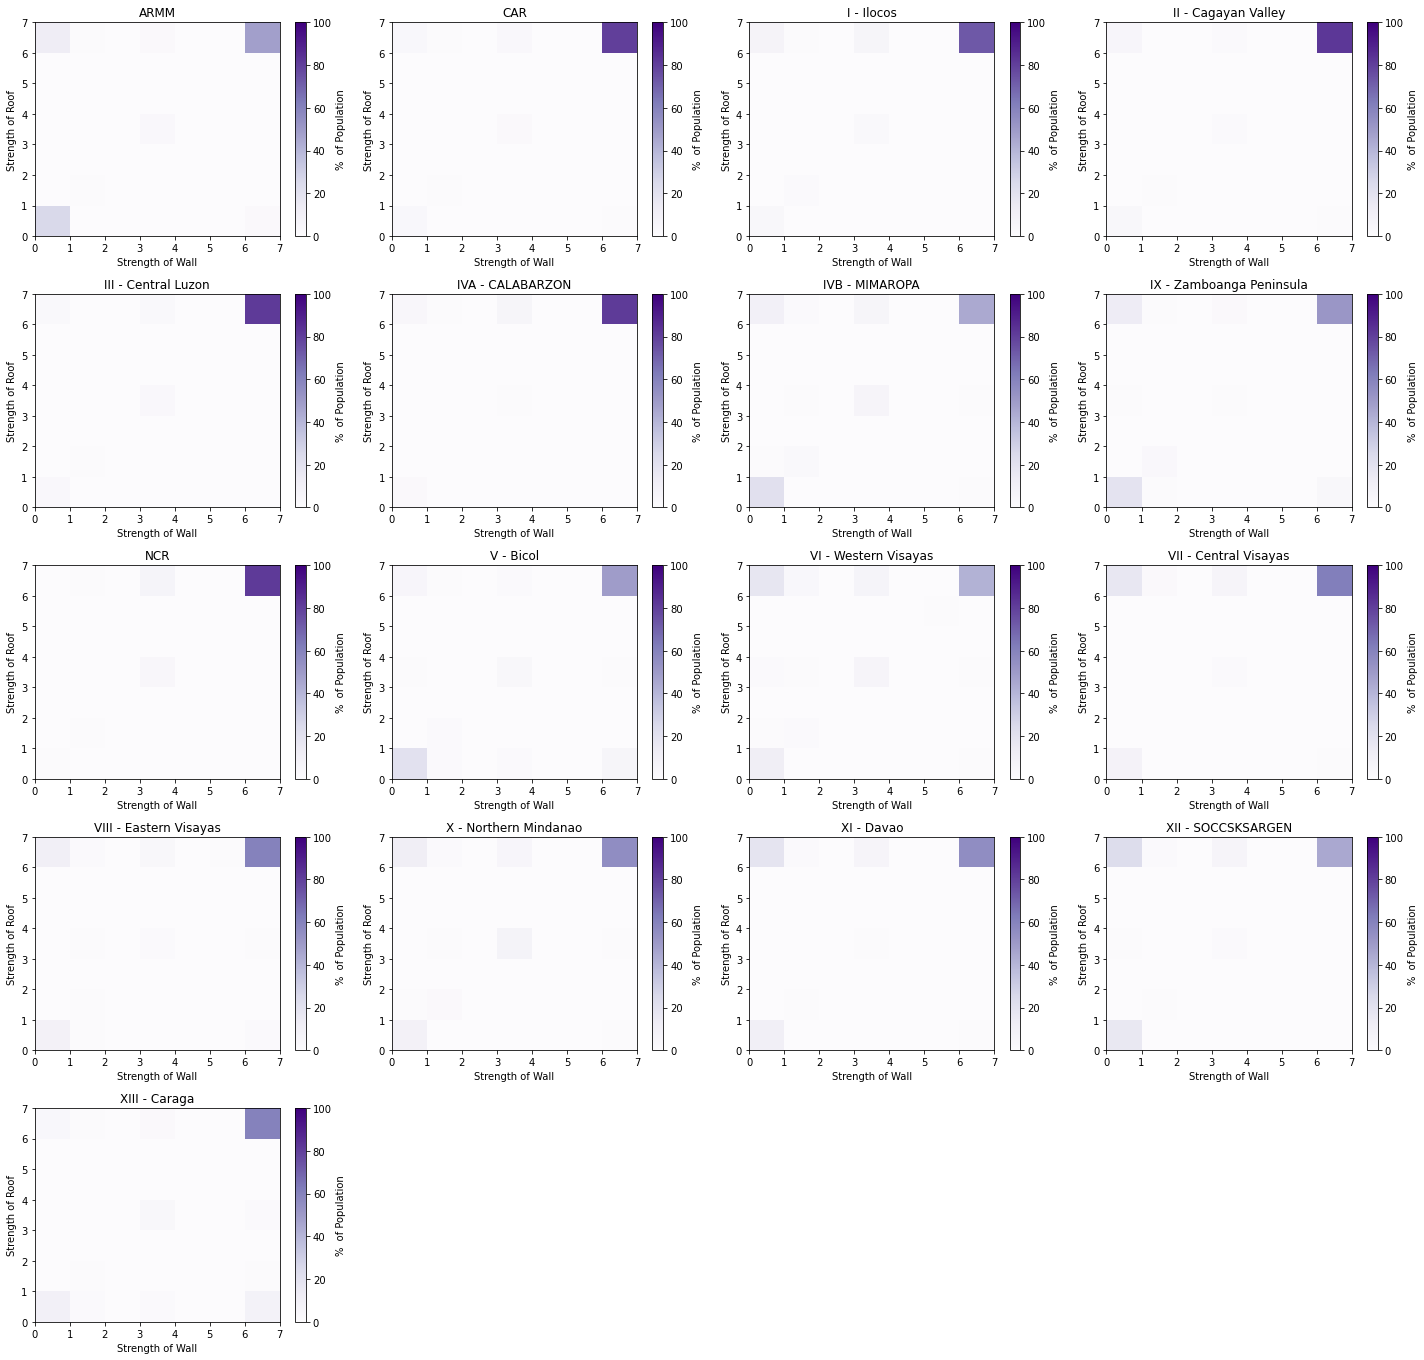

In [8]:
# Plot of Percent of Population in Different Type Structures
plt.figure(figsize=(20,19))

for i in range(len(regions)):
    plt.subplot(5,4,i+1)
    region = regions[i]
    plt.pcolormesh(pop_per_type[region]/pop_total[region]*100,cmap=plt.cm.Purples)
    cbar = plt.colorbar()
    plt.clim(0,100)
    plt.title(region)
    plt.xlabel('Strength of Wall')
    plt.ylabel('Strength of Roof')
    cbar.set_label('%  of Population')

plt.tight_layout()
plt.plot()

[]

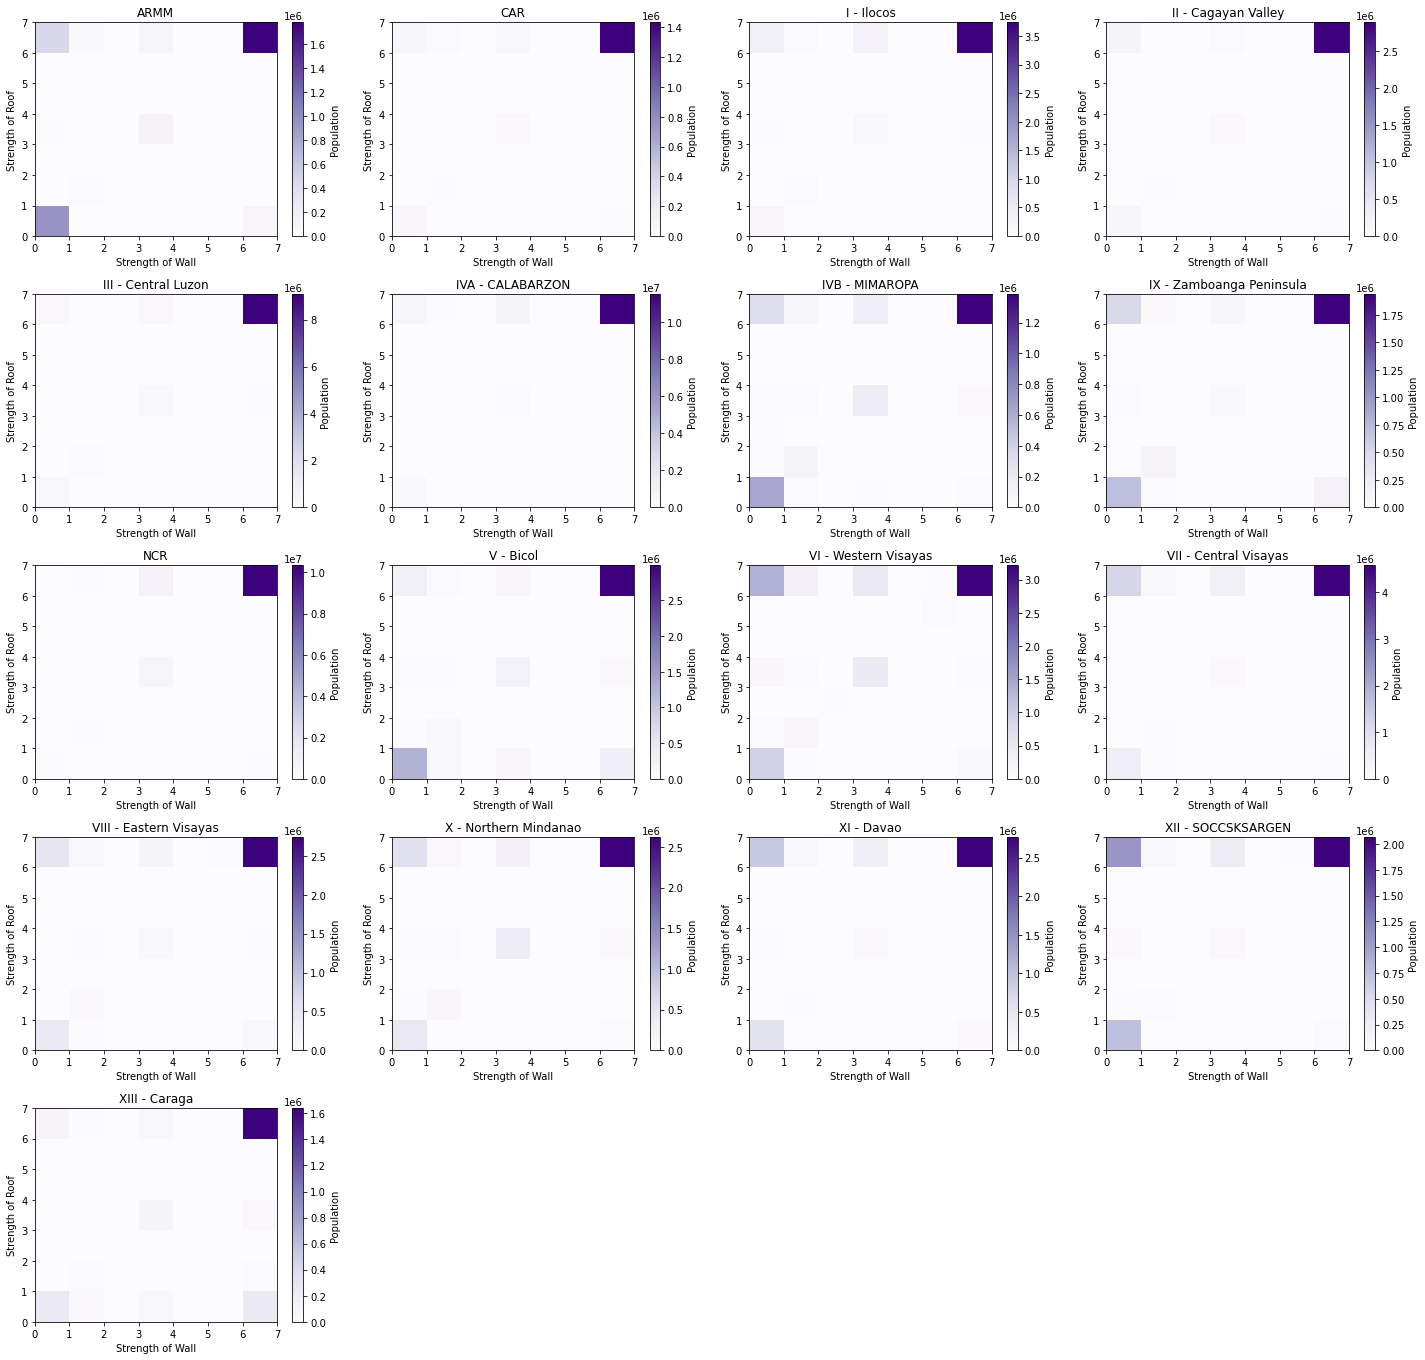

In [9]:
# Plot of Population in Different Type Structures
plt.figure(figsize=(20,19))

for i in range(len(regions)):
    plt.subplot(5,4,i+1)
    r = regions[i]
    plt.pcolormesh(pop_per_type[r],cmap=plt.cm.Purples)
    cbar = plt.colorbar()
    plt.title(r)
    plt.xlabel('Strength of Wall')
    plt.ylabel('Strength of Roof')
    cbar.set_label('Population')

plt.tight_layout()
plt.plot()

In [10]:
# Percents of different roof types
roof_percent = {}
roof_prop = {}
for i in range(len(regions)):
    reg = regions[i]
    roof_percent[reg] = np.sum(pop_per_type[reg]/pop_total[reg],axis=1)
    roof_prop[reg] = np.sum(pop_per_type[reg],axis=1)[6]/np.sum(pop_per_type[reg],axis=1)[0] # proportion strong/weak
roof_percent['all_phi'] = np.sum(allphi_pop_per_type/allphi_pop_total,axis=1)
roof_prop['all_phi'] = np.sum(allphi_pop_per_type,axis=1)[6]/np.sum(allphi_pop_per_type,axis=1)[0]

# Figure out roof percent for all places excluding NCR
pop_per_type_noncr = dict(pop_per_type)
del pop_per_type_noncr['NCR']
pop_total_noncr = dict(pop_total)
del pop_total_noncr['NCR']

# Stats for all Philippines minus NCR
noncr_pop_per_type = np.zeros([7,7])
noncr_pop_total = 0
for region in pop_total_noncr.keys():
    noncr_pop_total += pop_total_noncr[region]
    noncr_pop_per_type += pop_per_type_noncr[region]
roof_percent['all_phi_no_ncr'] = np.sum(noncr_pop_per_type/noncr_pop_total,axis=1)
roof_prop['all_phi_no_ncr'] = np.sum(noncr_pop_per_type,axis=1)[6]/np.sum(noncr_pop_per_type,axis=1)[0]

# Figure for paper: % of population in different roof types

[]

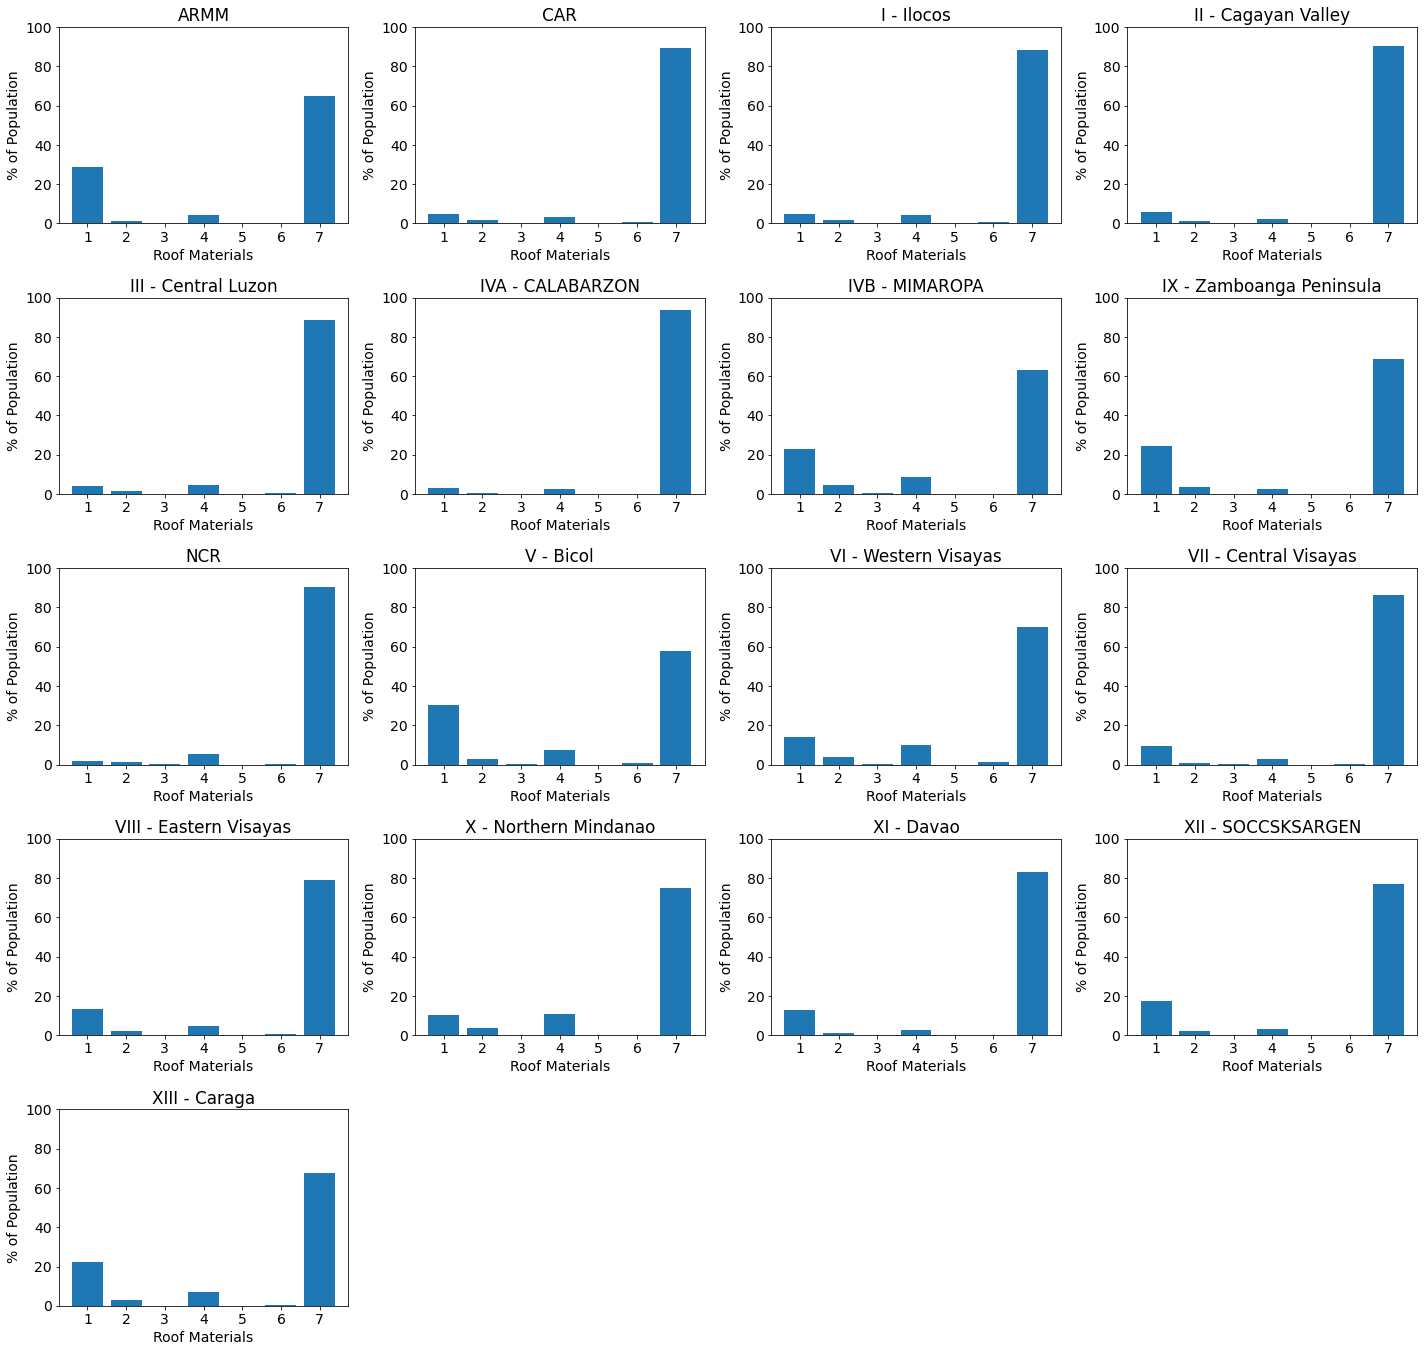

In [11]:
# Plot of Percent of Population in Different Roofs
plt.figure(figsize=(20,19))
plt.rcParams.update({'font.size': 14})

for i in range(len(regions)):
    plt.subplot(5,4,i+1)
    region = regions[i]
    plt.bar(np.arange(7),roof_percent[region]*100)
    #cbar = plt.colorbar()
    #plt.clim(0,100)
    plt.title(region)
    plt.xlabel('Roof Materials')
    plt.ylabel('% of Population')
    plt.ylim([0,100])
    #cbar.set_label('% of Population')
    plt.xticks(np.arange(0,7),np.arange(1,8))

plt.tight_layout()
#plt.savefig(root_dir+'/FIGURES/roofmaterials_byprovince.png',dpi=400)
plt.plot()


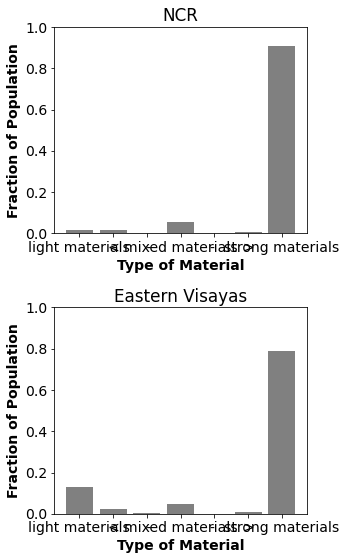

In [12]:
plt.figure(figsize=(5,8))

roof_labels = np.array(['light materials','<',' -','mixed materials','- ','>','strong materials'])

plt.subplot(211)
plt.bar(roof_labels,roof_percent['NCR'],color='0.5')
plt.xlabel('Type of Material',weight='bold')
plt.ylabel('Fraction of Population',weight='bold')
plt.title('NCR')
plt.ylim([0,1])

plt.subplot(212)
plt.bar(roof_labels,roof_percent['VIII - Eastern Visayas'],color='0.5')
plt.xlabel('Type of Material',weight='bold')
plt.ylabel('Fraction of Population',weight='bold')
plt.title('Eastern Visayas')
plt.ylim([0,1])

plt.tight_layout()

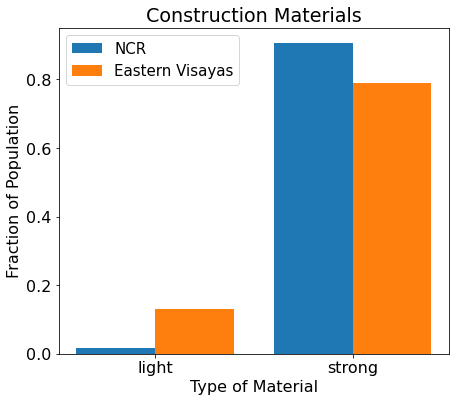

In [13]:
plt.figure(figsize=(7,6))
N = 7

plt.rcParams.update({'font.size': 16})

roof_labels = np.array(['light','strong'])

ind = np.arange(2) 
width = 0.4       
plt.bar(ind, [roof_percent['NCR'][0],roof_percent['NCR'][6]], width, label='NCR')
plt.bar(ind + width, [roof_percent['VIII - Eastern Visayas'][0],roof_percent['VIII - Eastern Visayas'][6]], width,
    label='Eastern Visayas')

plt.ylabel('Fraction of Population')
plt.xlabel('Type of Material')

plt.xticks(ind + width / 2, roof_labels)
plt.legend(loc='best',fontsize=15)
plt.title('Construction Materials')
#plt.savefig(root_dir+'/FIGURES/constructionmaterials.png',dpi=400)
plt.show()


# Load in optimal Vhalf parameter values for each province

In [14]:
# Load dictionaries of correlation metrics from sensitivity test

tdr = pickle.load(open(root_dir+"/ASSET_LOSSES/CORR_METRICS/tdr_2.p","rb"))
rmsf = pickle.load(open(root_dir+"/ASSET_LOSSES/CORR_METRICS/rmsf_2.p","rb"))

# ANALYSIS ACROSS DIFFERENT CORRELATION METRICS
Vthresh = np.arange(15,40,5)
Vhalf = np.arange(50,210,10)

lvt = len(Vthresh)
lvh = len(Vhalf)

regions = tdr['Vhalf-50_Vthresh-15'].keys() # extract names of different regions
tdr_dat = {}
rmsf_dat = {}

# Put all correlation statistics on grid vs Vthresh and Vhalf values for plotting
for reg in regions:
    tdr_grid = np.zeros((lvt,lvh))
    rmsf_grid = np.zeros((lvt,lvh))
    for i in np.arange(lvt):
        for j in np.arange(lvh):
            vt = Vthresh[i]
            vh = Vhalf[j]
            label = 'Vhalf-'+str(vh)+'_Vthresh-'+str(vt)
            tdr_grid[i,j] = tdr[label][reg]
            rmsf_grid[i,j] = rmsf[label][reg]

    tdr_dat[reg] = xr.DataArray(tdr_grid, coords=[("Vthresh", Vthresh), ("Vhalf", Vhalf)])
    rmsf_dat[reg] = xr.DataArray(rmsf_grid, coords=[("Vthresh", Vthresh), ("Vhalf", Vhalf)])


# Calculate different optimal fits
Vhalf_tdrfit = {}
Vhalf_rmsffit = {}
trans_tdr_dat = {}
for reg in regions:
    try:
        trans_tdr_dat[reg] = np.abs(np.log(tdr_dat[reg]))
        Vhalf_tdrfit[reg] = tdr_dat[reg].Vhalf[trans_tdr_dat[reg].sel(Vthresh=25).argmin().values]
    except ValueError:
        Vhalf_tdrfit[reg] = np.nan
    try:
        Vhalf_rmsffit[reg] = rmsf_dat[reg].Vhalf[rmsf_dat[reg].sel(Vthresh=25).argmin().values]
    except ValueError:
        Vhalf_rmsffit[reg] = np.nan
        

In [15]:
# nan values (because no recorded storms in historical period impacting the region)
for key in Vhalf_tdrfit.keys():
    if np.isnan(Vhalf_tdrfit[key]):
        print(key)

ARMM


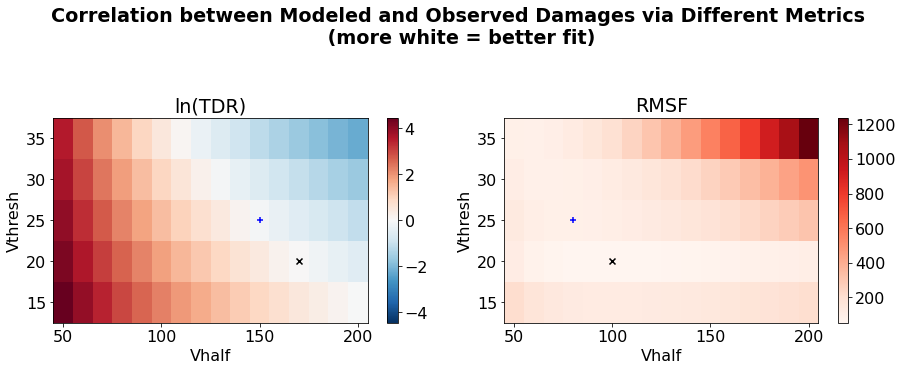

In [16]:
#PLOTTING GRID OF CORRELATION METRIC FOR ONE REGION
plt.figure(figsize=(13, 5))

reg = 'all'
Vth25i = np.where(rmsf_dat[reg].Vthresh==25)

ax = plt.subplot(121)
log_tdr = np.log(tdr_dat[reg])
log_tdr.plot()
plt.scatter(log_tdr.Vhalf[np.where(np.abs(log_tdr)== np.min(np.abs(log_tdr)))[1]],log_tdr.Vthresh[np.where(np.abs(log_tdr)== np.min(np.abs(log_tdr)))[0]],color='k',marker='x')
plt.scatter(log_tdr.Vhalf[np.where(np.abs(log_tdr.sel(Vthresh=25))==np.min(np.abs(log_tdr.sel(Vthresh=25))))],log_tdr.Vthresh[Vth25i],color='b',marker='+')
plt.title('ln(TDR)')

ax = plt.subplot(122)
rmsf_dat[reg].plot(cmap = plt.cm.Reds)
plt.scatter(rmsf_dat[reg].Vhalf[np.where(rmsf_dat[reg]== np.min(rmsf_dat[reg]))[1]],rmsf_dat[reg].Vthresh[np.where(rmsf_dat[reg]== np.min(rmsf_dat[reg]))[0]],color='k',marker='x')
plt.scatter(rmsf_dat[reg].Vhalf[np.where(rmsf_dat[reg].sel(Vthresh=25)==np.min(rmsf_dat[reg].sel(Vthresh=25)))],rmsf_dat[reg].Vthresh[Vth25i],color='b',marker='+')
plt.title('RMSF')

plt.suptitle('Correlation between Modeled and Observed Damages via Different Metrics\n (more white = better fit)', fontweight='bold',y=1.04)
plt.tight_layout()
#plt.savefig(root_dir+'/FIGURES/correlations.png')

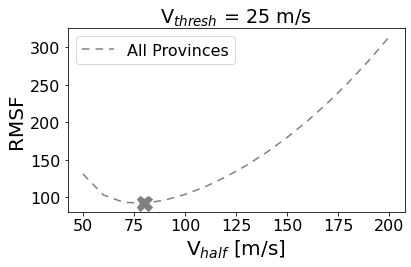

In [17]:
x = rmsf_dat['all'].sel(Vthresh=25)
x.plot(color='grey',dashes=[5,4,5,4],label='All Provinces')
plt.ylabel('RMSF',fontsize=20)
plt.plot(x.Vhalf[np.where(x== np.min(x))],x[np.where(x== np.min(x))],marker='X',markersize=15,color='grey')
plt.xlabel('V$_{half}$ [m/s]',fontsize=20)
plt.title('V$_{thresh}$ = 25 m/s')
plt.legend()
plt.tight_layout()
#plt.savefig(root_dir+'/FIGURES/allphi_rmsffitmethod.png',dpi=400)


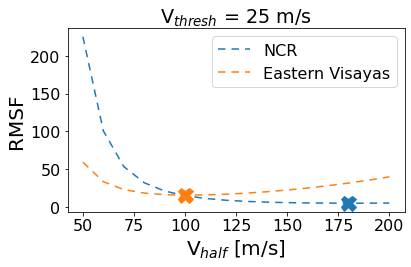

In [18]:
#x1 = rmsf_dat['all'].sel(Vthresh=25)
x2 = rmsf_dat['NCR'].sel(Vthresh=25)
x3 = rmsf_dat['Eastern Visayas'].sel(Vthresh=25)

#x1.plot(color='grey',dashes=[5,4,5,4],label='All')
x2.plot(dashes=[5,4,5,4],label='NCR')
x3.plot(dashes=[5,4,5,4],label='Eastern Visayas')

plt.ylabel('RMSF',fontsize=20)
#plt.plot(x1.Vhalf[np.where(x1== np.min(x1))],x1[np.where(x1== np.min(x1))],marker='X',markersize=15,color='grey')
plt.plot(x2.Vhalf[np.where(x2== np.min(x2))],x2[np.where(x2== np.min(x2))],marker='X',markersize=15,color='tab:blue')
plt.plot(x3.Vhalf[np.where(x3== np.min(x3))],x3[np.where(x3== np.min(x3))],marker='X',markersize=15,color='tab:orange')
plt.legend()
plt.xlabel('V$_{half}$ [m/s]',fontsize=20)
plt.title('V$_{thresh}$ = 25 m/s')
plt.tight_layout()
#plt.savefig(root_dir+'/FIGURES/provinces_rmsffitmethod.png',dpi=400)


In [19]:
# Making region names consistent between state_ids and Vhalf_est dicts

roof_prop['Ilocos Region'] = roof_prop.pop('I - Ilocos') 
roof_prop['Cagayan Valley'] = roof_prop.pop('II - Cagayan Valley') 
roof_prop['Central Luzon'] = roof_prop.pop('III - Central Luzon') 
roof_prop['Calabarzon'] = roof_prop.pop('IVA - CALABARZON') 
roof_prop['Mimaropa'] = roof_prop.pop('IVB - MIMAROPA') 
roof_prop['Zamboanga Peninsula'] = roof_prop.pop('IX - Zamboanga Peninsula') 
roof_prop['Bicol Region'] = roof_prop.pop('V - Bicol') 
roof_prop['Western Visayas'] = roof_prop.pop('VI - Western Visayas') 
roof_prop['Central Visayas'] = roof_prop.pop('VII - Central Visayas') 
roof_prop['Eastern Visayas'] = roof_prop.pop('VIII - Eastern Visayas') 
roof_prop['Northern Mindanao'] = roof_prop.pop('X - Northern Mindanao') 
roof_prop['Davao Region'] = roof_prop.pop('XI - Davao') 
roof_prop['Soccsksargen'] = roof_prop.pop('XII - SOCCSKSARGEN') 
roof_prop['Caraga'] = roof_prop.pop('XIII - Caraga')
roof_prop['all'] = roof_prop.pop('all_phi')
roof_prop['ARMM'] = roof_prop.pop('ARMM')
roof_prop['CAR'] = roof_prop.pop('CAR')

In [20]:
roof_prop

{'NCR': 52.76705263711835,
 'all_phi_no_ncr': 6.518871899293956,
 'Ilocos Region': 18.992800618232675,
 'Cagayan Valley': 16.071327457862516,
 'Central Luzon': 21.16029183337496,
 'Calabarzon': 29.052997479298156,
 'Mimaropa': 2.7425749335277945,
 'Zamboanga Peninsula': 2.8045878568528577,
 'Bicol Region': 1.901722165735291,
 'Western Visayas': 4.93983314585276,
 'Central Visayas': 8.9623662724511,
 'Eastern Visayas': 5.983668558742702,
 'Northern Mindanao': 7.172874647968975,
 'Davao Region': 6.467942334431943,
 'Soccsksargen': 4.36311592073218,
 'Caraga': 3.0640095577344293,
 'all': 7.420709652102353,
 'ARMM': 2.2724555606857098,
 'CAR': 18.447118705891896}

In [23]:
# Calculate Linear Regression for Vhalf Coordinates
regions2 = list(regions)[2:] # remove 'All' and 'ARMM' (armm has no impacting storms)
vh_tdr = np.zeros(len(regions2))
vh_rmsf = np.zeros(len(regions2))
F = np.zeros(len(regions2))
for i in range(len(regions2)):
    reg = regions2[i]
    vh_tdr[i] = Vhalf_tdrfit[reg]
    vh_rmsf[i] = Vhalf_rmsffit[reg]
    F[i] = roof_prop[reg]
res_tdr = linregress(F,vh_tdr)
res_rmsf = linregress(F,vh_rmsf)

# Figure for paper-- proportion of strong to weak roofs

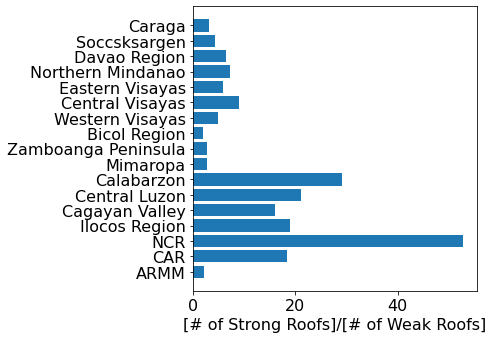

In [24]:
# Note: different regions then used for regression, because ARMM has roof proportion but no landfalling storms
regionsbar = list(regions)[1:] # remove 'All'
Fbar = np.zeros(len(regionsbar))
for i in range(len(regionsbar)):
    regbar = regionsbar[i]
    Fbar[i] = roof_prop[regbar]

plt.figure(figsize=(7, 5))
plt.barh(regionsbar,Fbar)
plt.xlabel('[# of Strong Roofs]/[# of Weak Roofs]')
plt.tight_layout()
# plt.savefig(root_dir+'/FIGURES/roofproportions.png',dpi=400)
# plt.savefig(root_dir+'/FIGURES/roofproportions.pdf')

In [25]:
# Calculate Vhalf for Different Provinces
Vhalf_est_tdr = {}
Vhalf_est_rmsf = {}
for region in regions:
    Vhalf_est_tdr[region] = res_tdr.intercept + res_tdr.slope*roof_prop[region]
    Vhalf_est_rmsf[region] = res_rmsf.intercept + res_rmsf.slope*roof_prop[region]

In [26]:
# Save out values
pickle.dump( Vhalf_est_tdr, open( root_dir+"/VULNERABILITY/Vhalf_est_tdr_2.p", "wb" ) )
pickle.dump( Vhalf_est_rmsf, open( root_dir+"/VULNERABILITY/Vhalf_est_rmsf_2.p", "wb" ) )

In [27]:
# Load Philippines province masks

d_mask = xr.open_dataset(root_dir+'/REGION_MASKS/philippines_province_masks_newlitpopgrid.nc')
pickle_in = open(root_dir+"/REGION_MASKS/state_ids.p","rb")
state_ids = pickle.load(pickle_in)

# Load Vhalf values from household survey data (TDR need to redo for RMSF)

tdr_province = pickle.load(open(root_dir+"/VULNERABILITY/Vhalf_est_tdr_2.p","rb"))
rmsf_province = pickle.load(open(root_dir+"/VULNERABILITY/Vhalf_est_rmsf_2.p","rb"))

#Vhalf_est = pickle.load(open("/home/jbaldwin/WorldBank/VULNERABILITY/Vhalf_est_tdr.p","rb"))

# Assign vulnerability on map to different provinces
tdr_map_province = xr.Dataset.copy(d_mask)
rmsf_map_province = xr.Dataset.copy(d_mask)
for key in list(regions)[1:]:
    tdr_map_province.states.values[tdr_map_province.states==state_ids[key]] = tdr_province[key]
    rmsf_map_province.states.values[rmsf_map_province.states==state_ids[key]] = rmsf_province[key]


tdr_map_province.to_netcdf(root_dir+'/VULNERABILITY/Vhalf_map_tdr_2.nc')
rmsf_map_province.to_netcdf(root_dir+'/VULNERABILITY/Vhalf_map_rmsf_2.nc')

In [48]:
# Define functions for bootstrapping linear regression confidence interval

def bootstrap_samples(x, y, n_samples):
    shape = np.shape(x)
    xstar = np.empty([shape[0],n_samples])
    ystar = np.empty([shape[0],n_samples])
    for n in np.arange(n_samples):
        xstar[:,n], ystar[:,n] = resample(x,y,replace=True)
    return xstar, ystar

def linregress_confidence_interval(x,y, xfit, n_samples,ci):
    # n_samples = number of times resample to create sample of same size as dataset (switch to 100 later)
    # ci = 0.05 # 0.05 (5%) on top and bottom to create 90% confidence intervals
    # x = values to calculate return periods for
    # y = sample of data to calculate statistics for
    # xfit = x-values to put the regression line on
    
    # Calculate regression for original data
    reg = linregress(x,y)
    yfit = reg.intercept + reg.slope*xfit

    # Resample data with replacement
    xstar, ystar = bootstrap_samples(x, y, n_samples)

    # Calculate return periods for resamples
    yfitstar = np.full([np.shape(xfit)[0],n_samples],np.nan)
    mstar = np.zeros(n_samples)
    bstar = np.zeros(n_samples)
    for i in range(n_samples):
        regstar = linregress(xstar[:,i],ystar[:,i])
        mstar[i] = regstar.slope
        bstar[i] = regstar.intercept
        yfitstar[:,i] = bstar[i] + mstar[i]*xfit
            
    # Produce upper and lower return period confidence interval
    diff = yfitstar-np.repeat(yfit[:, np.newaxis],n_samples,axis=1)
    ci_u = yfit+np.quantile(diff,1-ci,axis=1)
    ci_l = yfit+np.quantile(diff,ci,axis=1)
    
    return yfit, ci_u, ci_l

# Calculate linear regression confidence interval
n_samples = 1000
ci = 0.05
x = F
y = vh_rmsf
xfit = np.arange(0,60,1)
yfit, ci_u, ci_l = linregress_confidence_interval(x,y,xfit,n_samples,ci)

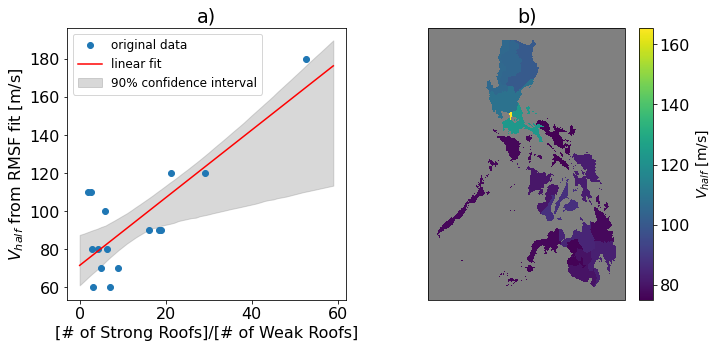

In [49]:
plt.figure(figsize=(11, 5))
plt.rcParams.update({'font.size': 16})

plt.subplot(121)
plt.plot(F,vh_rmsf, 'o', label='original data')
#plt.plot(x, res_rmsf.intercept + res_rmsf.slope*x, 'r', label='fitted line')
plt.plot(xfit, yfit, 'r', label='linear fit')
plt.fill_between(xfit,ci_u,ci_l,color='gray',alpha=0.3,label='90% confidence interval')
plt.legend(fontsize=12)
plt.xlabel('[# of Strong Roofs]/[# of Weak Roofs]')
plt.ylabel(r'$V_{half}$ from RMSF fit [m/s]')
plt.title('a)')

ax = plt.subplot(122,projection=ccrs.PlateCarree())
ax.set_facecolor('gray')
Vhalf_map = xr.open_dataset('Vhalf_map_rmsf_2.nc')
p = Vhalf_map.states.plot(transform=ccrs.PlateCarree(), add_colorbar = False)
cb = plt.colorbar(p, orientation="vertical")
cb.set_label(label=r'$V_{half}$ [m/s]',fontsize=14)
#ax.coastlines('50m')
plt.title('b)')

plt.savefig(root_dir+'/FIGURES/province_vhalf_2.png',dpi=600)
#plt.savefig(root_dir+'/FIGURES/province_vhalf_2.pdf')
#plt.tight_layout()
